In [1]:
pip install panda

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt , date

In [9]:
hospital_data = pd.read_excel('HospitalDatabase.xlsx')
hospital_data.tail()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English
944,945,Walsh,Calvie,1972-08-06 03:40:03.454,Male,Black/African-American,English


In [17]:
hospital_data = pd.read_excel('HospitalDatabase.xlsx','Patients')
hospital_data.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


# 21.Which reason of visit has maximum mortality rate.

In [25]:
df = pd.read_excel("HospitalDatabase.xlsx", sheet_name=["Patients","EDVisits","AmbulatoryVisits","ReAdmissionRegistry","Discharges","Providers","EDUnique"])

In [26]:
#dataframes used 
readmission_reg=df['ReAdmissionRegistry']
EDuniq=df['EDUnique']

In [27]:
#joining the dataframes
df_inner= pd.merge(readmission_reg,EDuniq, on='PatientID', how='inner')
type(df_inner)
df_inner.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,EDVisitID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,2,2020-01-01 00:00:40.339,2020-01-01 11:46:34.398,1,Migraine,Discharged
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,55,2020-01-01 15:01:29.846,2020-01-01 23:11:53.864,3,Migraine,admitted
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,5,2020-01-01 00:38:15.540,2020-01-01 13:19:43.485,1,Fever,Discharged
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,6,2020-01-01 00:39:22.945,2020-01-01 05:16:35.323,1,Fever,Discharged


In [28]:
#Grouping the data where dischargedisposition is "Expired"

In [29]:
new_df=df_inner[df_inner.DischargeDisposition=='Expired']
new_df.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,EDVisitID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
7,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540,NaN,NaN,1.0,100,2020-01-02 01:42:21.609,2020-01-03 01:01:59.804,4,Shortness of Breath,admitted
29,178,26,2018-02-02,2018-02-14 20:03:29.280,Expired,Hospitalist,Flu,6.306908,0.620570,NaN,NaN,1.0,26,2020-01-01 06:14:46.240,2020-01-01 15:34:00.868,5,Chest Pain,Admitted
98,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,NaN,NaN,1.0,184,2020-01-03 02:52:59.647,2020-01-03 11:02:00.183,1,Fever,Discharged
106,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887,NaN,NaN,1.0,192,2020-01-03 05:06:23.929,2020-01-03 16:27:48.524,2,Migraine,Admitted
107,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163,NaN,NaN,1.0,193,2020-01-03 05:27:19.166,2020-01-04 04:53:48.392,3,Stomach Ache,Admitted


In [30]:
#getting the count of patientid by Grouping the data based on Reason of visit and discharge disposition.

In [31]:
max_mortality=new_df.groupby(['ReasonForVisit','DischargeDisposition'])['PatientID'].count().reset_index()
end_result=max_mortality.rename(columns={'PatientID':'Count_of_patients'})
print(end_result[end_result.Count_of_patients == end_result.Count_of_patients.max()])

  ReasonForVisit DischargeDisposition  Count_of_patients
4          Fever              Expired                 22


# 22.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).


# 23.Add column 'Age' in Patient table.


In [33]:
#data frame
patients=df['Patients']

In [34]:
#define now parameter
now = pd.to_datetime('now')

/Users/shub/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [35]:
#calculate Age
patients['Age']=(now - patients['DateOfBirth']).astype('<m8[Y]') 
patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63.0
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37.0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0


# 24.Using arrays and loops, find the count of patients based on gender.


In [37]:
#dataframe
patients=df['Patients']
readmission_reg=df['ReAdmissionRegistry']

In [38]:
#copy the contents of patientid and gender to another dataframe.
discharge_date=readmission_reg[['DischargeDate']].copy()
pantient_df=patients[['PatientID','Gender']].copy()

In [39]:
#create an array for each column patientID & Gender.
array_patientID=pantient_df['PatientID'].to_numpy()
array_gender=pantient_df['Gender'].to_numpy()

In [40]:
#creating a dictionary with the above 2 arrays.
patient_dict=dict(zip(array_patientID,array_gender))

In [44]:
#Function to calculating the count of male & female using arrays & loops.
countMale=0
countFemale=0
for x in patient_dict:
    if patient_dict[x]=='Male':
        countMale+= 1
    else:
        countFemale+=1
print(f"Male count- {countMale}, Female count- {countFemale}")

Male count- 537, Female count- 408


# 25.Create bins to segregate Patients with 'Mild Hypertension', 'Moderate',  'High Hypertension' ,'Severe Hypertension'. Create a new column to show your analysis.

# 26.Plot a graph to show the distribution of expected mortality.

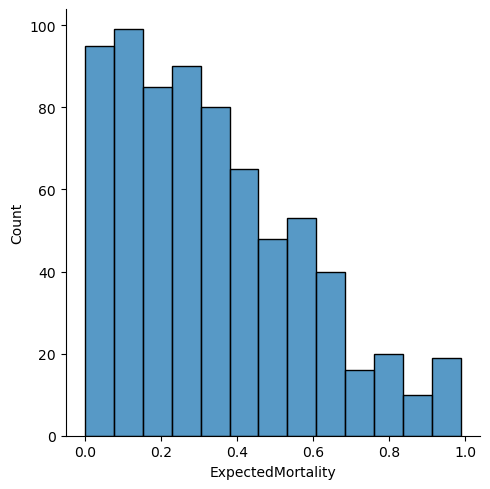

In [4]:
df = pd.read_excel('HospitalDatabase.xlsx','Discharges')
sns.displot(data=df, x="ExpectedMortality")

# 27.Which departmentID has maximum number of visits scheduled.


In [9]:
av = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')

In [10]:
print(av.groupby('VisitDepartmentID')['VisitID'].count())


VisitDepartmentID
1      51
2      51
3      51
4      51
5      92
6      92
7      93
8      93
9      79
10    100
11    102
12     95
Name: VisitID, dtype: int64


In [28]:
print("DepartmentID with maximum number of visits scheduled:- ",(av.groupby('VisitDepartmentID')['VisitID'].count().max()))
print ("The departmentID with maximum number of visits scheduled:- " +str(av.loc[av['VisitDepartmentID'].max(),'VisitDepartmentID']))


DepartmentID with maximum number of visits scheduled:-  102
The departmentID with maximum number of visits scheduled:- 11


# 28.Find the visit type with maximum 'No Show'.

# 29.Which demographic patients are prone to get stroke?

In [36]:
hospital_data = 'HospitalDatabase.xlsx'
Patients = pd.read_excel(hospital_data,sheet_name='Patients')
Discharges = pd.read_excel(hospital_data,sheet_name='Discharges')
merged = Patients.merge(Discharges, left_on='PatientID', right_on='PatientID')
df = merged.loc[(merged['PrimaryDiagnosis'] == "Stroke")]
df['Race'].max()

'White'

# 30.Using loc,get the details of the providers where providerid is between 11 and 20 and providerSpecialty is Surgery.

In [38]:
#read hospital dataset - Providers
hospital_data=pd.read_excel('HospitalDatabase.xlsx','Providers')

In [39]:
hospital_data[hospital_data.ProviderSpecialty == 'Surgery'].loc[10:19]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


# 31.If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [40]:
df = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(df,sheet_name='Patients')

# condition
male = (Patients_df['Gender'] == 'Male')
female = (Patients_df['Gender'] == 'Female')

#add string
Patients_df.loc[male, 'FirstName'] = 'Mr. ' + Patients_df['FirstName'].astype(str)
Patients_df.loc[female, 'FirstName'] = 'Ms. ' + Patients_df['FirstName'].astype(str)

print(Patients_df.loc[male, 'FirstName'])
print(Patients_df.loc[female, 'FirstName'])


0         Mr. Lanni
1           Mr. Far
2       Mr. Devlin 
3       Mr. Carmine
4         Mr. Tann 
           ...     
940         Mr. Wat
941      Mr. Wandie
942     Mr. Diahann
943    Mr. Panchito
944       Mr. Walsh
Name: FirstName, Length: 537, dtype: object
25        Ms. Sally
26         Ms. Mike
27       Ms. Jordan
28          Ms. Ted
29          Ms. Ala
           ...     
914    Ms. Jerrilyn
915      Ms. Kaylil
916      Ms. Velvet
917        Ms. Kiri
918    Ms. Champlin
Name: FirstName, Length: 408, dtype: object
